Objectives:

    Use scikit-learn to implement Simple  and Multiple Linear Regression
    Create a model, train and test it.


# importing needed packages

In [216]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [217]:
data = pd.read_csv("C:\\Users\\nanay\\Downloads\\my2024-fuel-consumption-ratings.csv", encoding='latin-1')
data

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Fuel consumption(L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2024,Volvo,V60 CC B5 AWD,Station wagon: Small,2.0,4,AS8,Z,10.0,7.5,8.9,32,207,5,5
764,2024,Volvo,V90 CC B6 AWD,Station wagon: Mid-size,2.0,4,AS8,Z,10.7,8.1,9.5,30,223,5,7
765,2024,Volvo,XC40 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,9.9,7.8,9.0,31,210,5,5
766,2024,Volvo,XC60 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,10.6,8.3,9.6,29,226,5,5


In [218]:
# Describe the data
data.describe

<bound method NDFrame.describe of      Model year   Make              Model                    Vehicle class  \
0          2024  Acura     Integra A-SPEC                        Full-size   
1          2024  Acura     Integra A-SPEC                        Full-size   
2          2024  Acura     Integra Type S                        Full-size   
3          2024  Acura         MDX SH-AWD     Sport utility vehicle: Small   
4          2024  Acura  MDX SH-AWD Type S  Sport utility vehicle: Standard   
..          ...    ...                ...                              ...   
763        2024  Volvo      V60 CC B5 AWD             Station wagon: Small   
764        2024  Volvo      V90 CC B6 AWD          Station wagon: Mid-size   
765        2024  Volvo        XC40 B5 AWD     Sport utility vehicle: Small   
766        2024  Volvo        XC60 B5 AWD     Sport utility vehicle: Small   
767        2024  Volvo        XC90 B6 AWD  Sport utility vehicle: Standard   

     Engine size (L)  Cylinde

In [219]:
# renaming the columns
data.rename(columns = 
            {"Engine size (L)" : "engine_size",
            "Fuel consumption(L/100 km)" : "Fuel_consumption",
            "CO2 emissions (g/km)" : "emissions"},inplace = True)

In [220]:
# Select the columns you need 
to_use = data[['engine_size','Cylinders','Fuel_consumption','emissions']]

to_use

,engine_size,Cylinders,Fuel_consumption,emissions
0,1.5,4,7.4,172
1,1.5,4,7.8,181
2,2.0,4,9.9,230
3,3.5,6,11.2,263
4,3.0,6,12.4,291
...,...,...,...,...
763,2.0,4,8.9,207
764,2.0,4,9.5,223
765,2.0,4,9.0,210
766,2.0,4,9.6,226


In [221]:
# Get the info on the data
to_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   engine_size       768 non-null    float64
 1   Cylinders         768 non-null    int64  
 2   Fuel_consumption  768 non-null    float64
 3   emissions         768 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 24.1 KB


In [222]:
# Summary statistics
to_use.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,768.0,3.086198,1.268500,1.2,2.0,3.0,3.6,8.0
Cylinders,768.0,5.541667,1.891678,3.0,4.0,6.0,6.0,16.0
Fuel_consumption,768.0,11.071224,2.845196,4.4,9.0,11.0,12.8,26.1
emissions,768.0,259.190104,64.902216,104.0,210.0,260.0,299.0,608.0


### From the information and summary ststistics of the data, we can tell it is already a cleaned data.

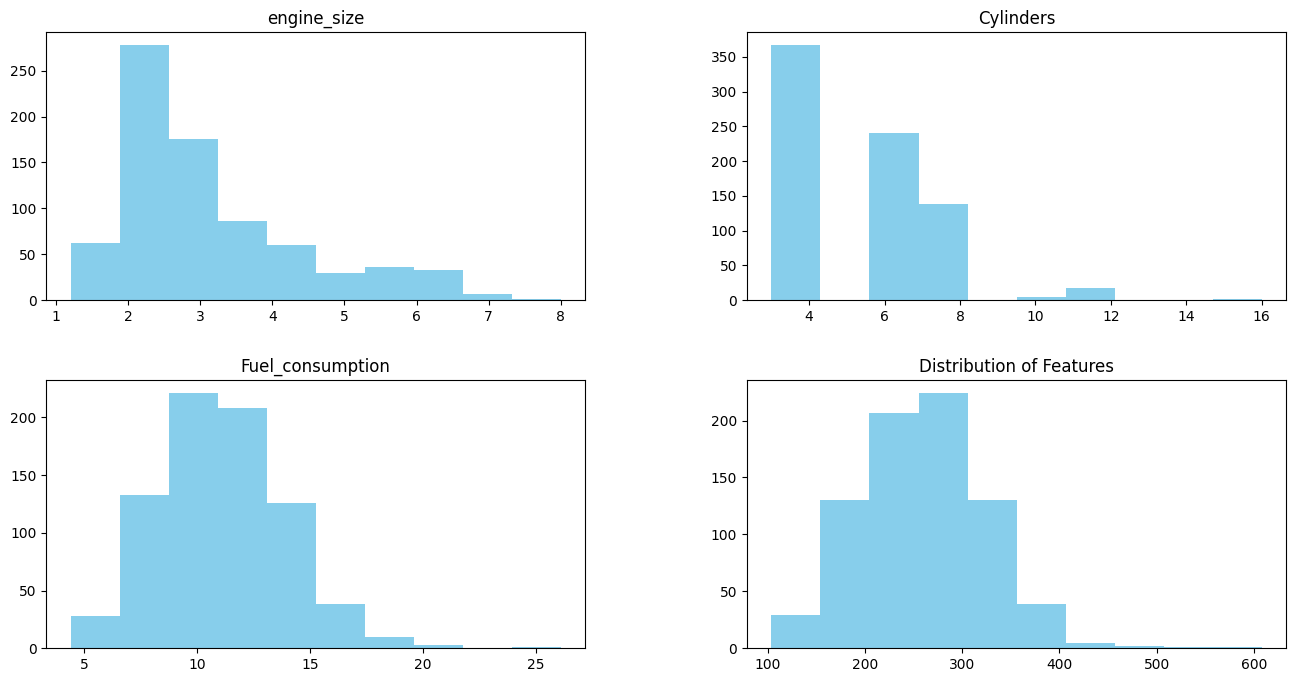

In [223]:
# create a histogram to show the distribution
to_use.hist(figsize=(16, 8), grid=False, color='skyblue')
plt.title('Distribution of Features')
plt.show()

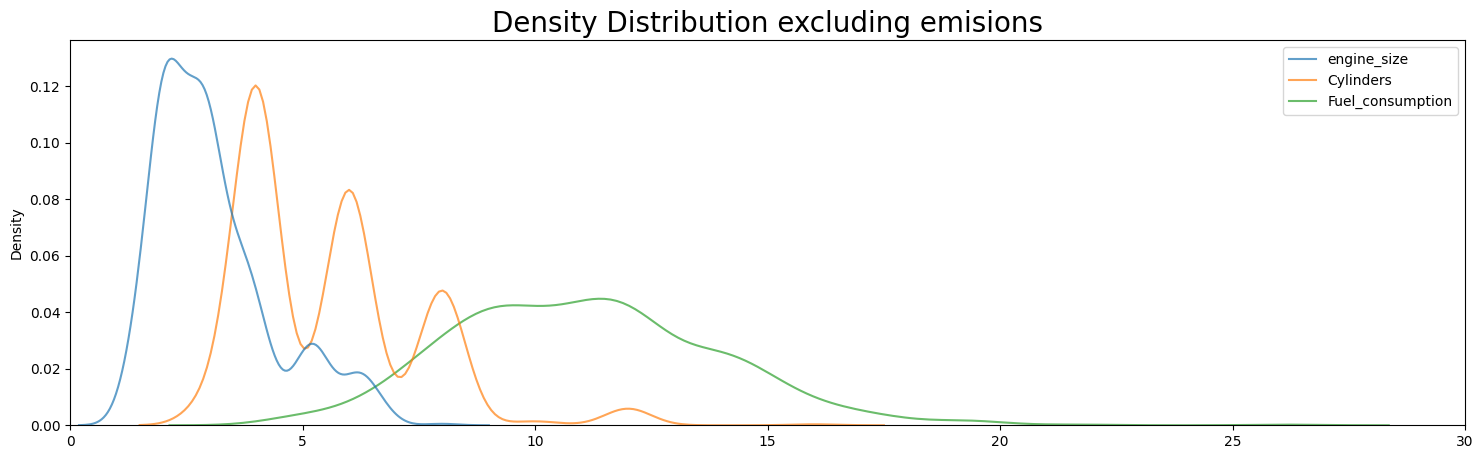

In [224]:
import seaborn as sns

# Density Distribution ( excluding emisions)

plt.figure(figsize=(18, 5))
sns.kdeplot(to_use.drop(columns ='emissions'), alpha=0.7)
plt.xlim(0, 30)
plt.title('Density Distribution excluding emisions', fontsize=20)
plt.show()

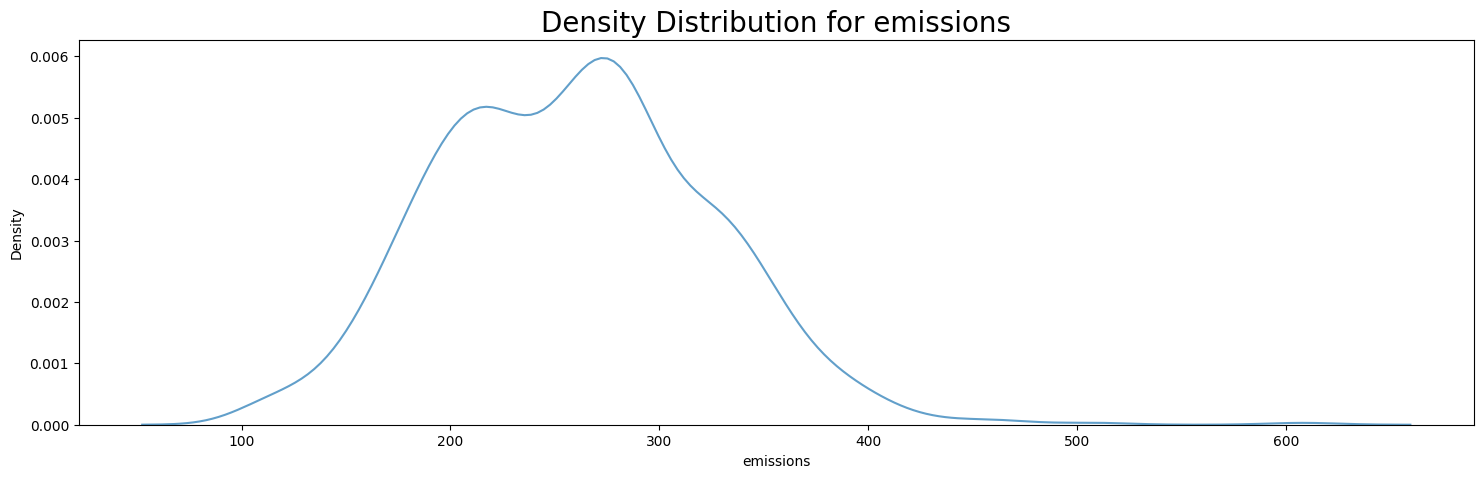

In [225]:
# Density Distribution for emissions

plt.figure(figsize=(18, 5))
sns.kdeplot(to_use['emissions'], alpha=0.7)
plt.title('Density Distribution for emissions', fontsize=20)
plt.show()

# Skewness is a measure of the asymmetry of the data distribution.
* Skewness = 0: Perfectly symmetrical distribution (like a normal distribution).
* Skewness > 0: Positive skew (right-skewed) – the right tail is longer or flatter.
* Skewness < 0: Negative skew (left-skewed) – the left tail is longer or flatter.

In [226]:
# check the value for skewness
to_use.skew()

engine_size         1.112042
Cylinders           1.260183
Fuel_consumption    0.508934
emissions           0.380989
dtype: float64

### Since there is skewness in the data, we will apply log transformation to reduce the skewness

#### Check for outliers

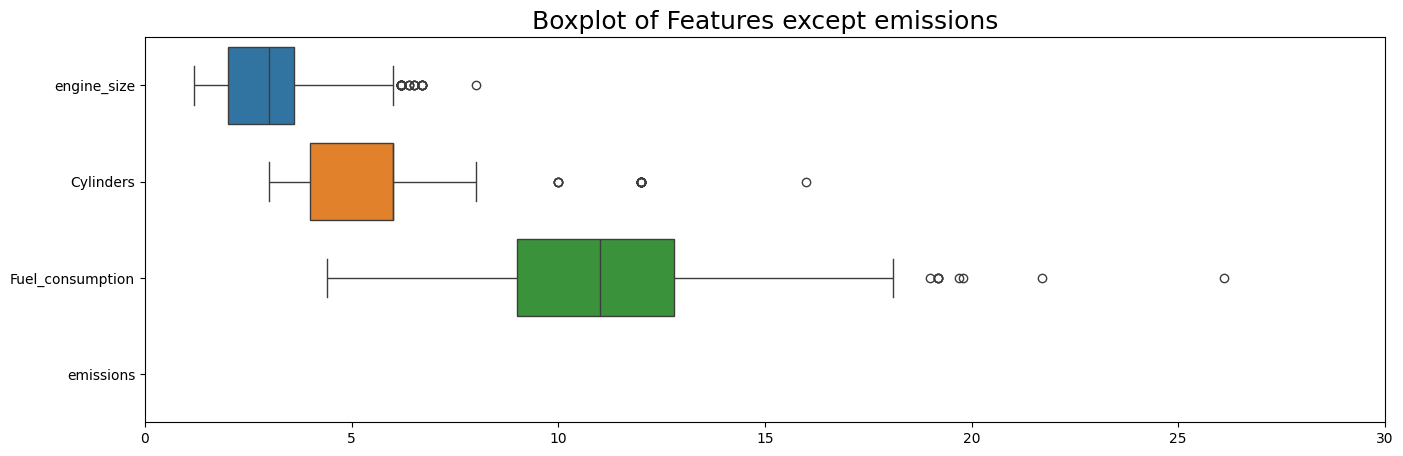

In [239]:
# Check for Outliers

plt.figure(figsize=(16, 5)) 
sns.boxplot(to_use, orient='h')
plt.xlim(0,30)
plt.title('Boxplot of Features except emissions', fontsize=18)
plt.show()

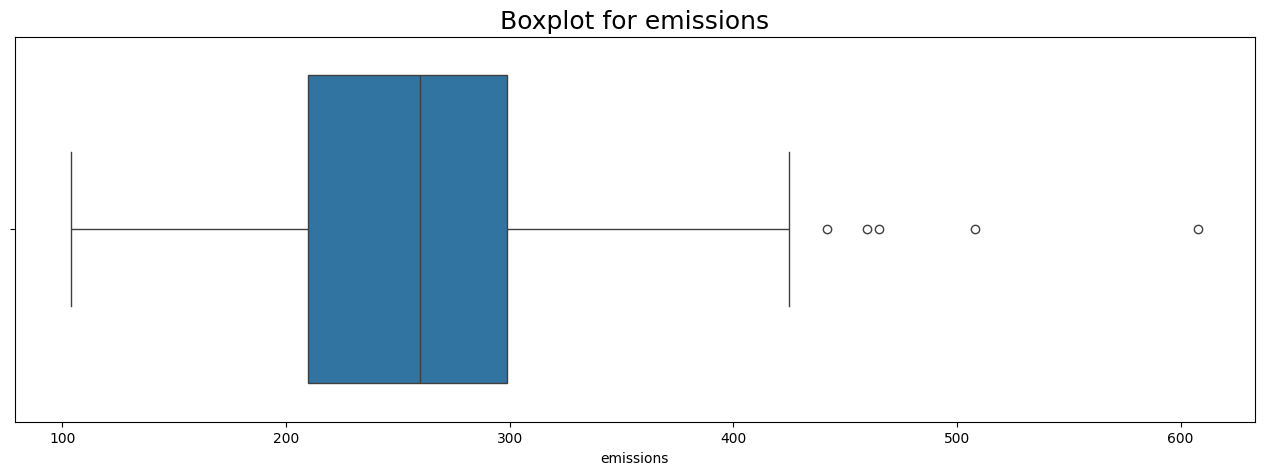

In [240]:
# Check for Outliers

plt.figure(figsize=(16, 5)) 
sns.boxplot(to_use['emissions'], orient='h')
plt.title('Boxplot for emissions', fontsize=18)
plt.show()

### Check for correlation

In [241]:
# Correlation
correlation = to_use.corr()

correlation

,engine_size,Cylinders,Fuel_consumption,emissions
engine_size,1.000000,0.916953,0.793086,0.785690
Cylinders,0.916953,1.000000,0.788653,0.791205
Fuel_consumption,0.793086,0.788653,1.000000,0.981656
emissions,0.785690,0.791205,0.981656,1.000000


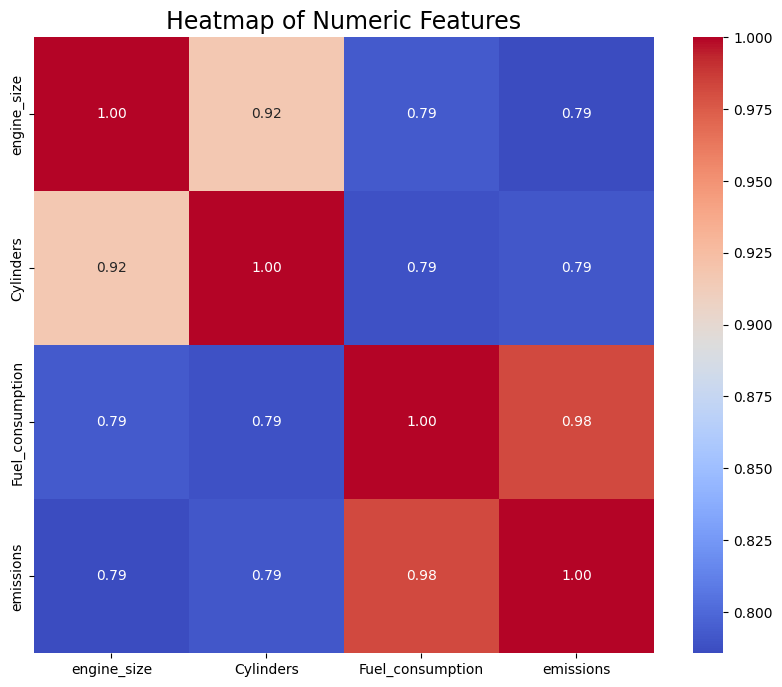

In [242]:
# plot the correlation graph

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Numeric Features', fontsize=17)
plt.show()

#### **Split Dataset into Training and Evaluation**
- Multiple Linear Regression

- X = input_data 
- y = label

In [243]:
x = to_use.drop('emissions', axis=1)
y = to_use['emissions']

In [244]:
# import train_test split

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

### The FunctionTransformer from scikit-learn allows us to apply a custom transformation, such as a logarithmic transformation, to specific features.

In [245]:
from sklearn.pipeline import Pipeline


# Define log transformation using FunctionTransformer
# log_transformer = FunctionTransformer(np.log1p, validate=True)

from sklearn.linear_model import LinearRegression

# Define the model
# model = LinearRegression()


In [246]:
# Add as a pipeline

pipeline = Pipeline(steps=[
    ('log_transformation', log_transformer),  # Apply log transformation
    ('model', LinearRegression())        # Apply linear regression model
])

In [247]:
# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Fit the data ( when not using a pipeline)
# model.fit(x_train,y_train)

Pipeline(steps=[('log_transformation',
                 FunctionTransformer(func=<ufunc 'log1p'>, validate=True)),
                ('model', LinearRegression())])

In [248]:
# Predict ( using the test data)
y_predicted = pipeline.predict(x_test)

In [249]:

from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

mse = mean_squared_error(y_test, y_predicted)

rmse = root_mean_squared_error(y_test, y_predicted)

r2 = r2_score(y_test, y_predicted)

In [250]:
print(mse)

print(rmse)

print(r2)

200.0002778553285
14.142145447396887
0.9522568114780843
